# Project 2: Investigate a dataset
## Udacity-Data Analyst Nanodegree
### By Phong Tran
### Dublin, 24 August 2018


## I. Data Gathering 
Data is collected from: [Gapminder World website](https://www.gapminder.org/data/)  
All the indicators are the new, updated ones, which can be downloaded in CSV or XLSX format.  
Indicators downloaded are:
* Babies per woman
* CO2 emissions
* Child mortality 
* Income
* Life expectancy 


## II.	Research questions  

1.	In general, what does the life expectancy around the world look like.  
    ♦	Have certain regions of the world been growing in life expectancy better than the rest?   
    ♦	Have certain periods that the life expectancy decreases?
2.	In general, what does the number of babies per woman around the world look like?
3.	In general, what does the child mortality rate around the world look like?
4.	In general, what does the amount of CO2 emissions around the world look like?
5.	In general, what does the incomes around the world look like?

6.	Which factor has the strongest relation to the life expectancy in your region?
7.	What is the relationship between the number of babies per woman vs child mortality in your region?
8.	What is the relationship between the number of babies per woman vs life expectancy in your region?
9.	What is the relationship between the amount of CO2 emissions vs the Income in your region?
10.	Which factor has the strongest relation to the Income in your region?


## III.	Data Wrangling

For this part, the following steps will be taken to answer each research question  
I.	Data Assessing & Cleaning   
II.	Data Exploration   
III.	Data Visualization 



### Research question 1  
In general, what does the life expectancy around the world look like?  
♦ Have certain regions of the world been growing in life expectancy better than the rest?  
♦ Have certain periods that the life expectancy decreases?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_life= pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/life_expectancy_years.csv')

In [3]:
df_life.head(2)

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0


Check the number of **null values** in the dataset

In [4]:
sum(df_life.isnull().any())

172

Check whether the dataset has **duplicated values**

In [5]:
sum(df_life.duplicated())

0

Identify the region, i.e continent for each country

Create a new column named 'region' to map the continent

In [7]:
df_life['region']=np.repeat('',df_life.shape[0])

Create 5 dataframes for 5 continent dataset. Each dataset contains a list of countries in that continent.  
These datasets are downloaded from [Country-list.info](http://www.countries-list.info/Download-List) in text format.
Please let me know if you need me to submit these txt files

In [8]:
dw_af=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Africa.txt')
dw_as=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Asia.txt')
dw_eu=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Europe.txt')
dw_oc=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Oceania.txt')
dw_am=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/America.txt')

Convert these dataframes to list in order to extract country names

In [10]:
dw_af=dw_af.values.T.tolist()
dw_as=dw_as.values.T.tolist()
dw_eu=dw_eu.values.T.tolist()
dw_oc=dw_oc.values.T.tolist()
dw_am=dw_am.values.T.tolist()

Assign the names of 5 continent for corresponding coutries in the list

In [11]:
df_life.loc[df_life['geo'].isin(dw_af[0]),['region']]="Africa"
df_life.loc[df_life['geo'].isin(dw_as[0]),['region']]="Asia"
df_life.loc[df_life['geo'].isin(dw_eu[0]),['region']]="Europe"
df_life.loc[df_life['geo'].isin(dw_oc[0]),['region']]="Oceania"
df_life.loc[df_life['geo'].isin(dw_am[0]),['region']]="America"

Double check to see the countries without region assigned 

In [12]:
df_life.query("region==''")

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,region
38,"Congo, Dem. Rep.",31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,31.6,...,57.5,58.0,58.5,59.3,60.1,60.9,61.6,62.0,62.4,
39,"Congo, Rep.",32.7,32.7,32.7,32.7,32.7,32.7,32.7,32.7,32.7,...,60.4,61.1,61.5,62.0,62.4,62.6,63.0,63.4,63.9,
41,Cote d'Ivoire,31.2,31.2,31.2,31.2,31.2,31.2,31.2,31.2,31.2,...,56.3,56.9,57.4,58.1,58.6,59.2,60.0,60.6,61.2,
98,"Macedonia, FYR",36.1,36.1,36.1,36.1,36.1,36.1,36.1,36.1,36.1,...,74.0,74.2,74.2,74.3,74.4,74.6,74.9,75.0,75.2,
109,"Micronesia, Fed. Sts.",26.7,26.7,26.7,26.7,26.7,26.7,26.7,26.7,26.7,...,65.4,65.4,65.6,65.6,65.5,65.3,65.6,65.7,65.8,


These countries may not be in the country lists or could not matched. Manually assign their regions 

In [13]:
df_life.loc[[38,39,41],['region']]="Africa"
df_life.loc[98,['region']]="Europe"
df_life.loc[109,['region']]="Oceania"

Double check the countries without region assigned

In [14]:
df_life.query("region==''")

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,region


Calculus mean by region and assign to a new dataframe for later purposes 

In [15]:
dflm=df_life.groupby('region').mean()

Draw the line graph of the average life expectancy for each region. The dataframe is transposed first to get the right format for the drawing 

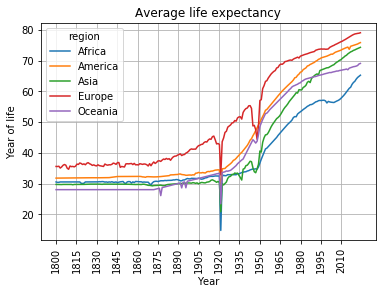

In [16]:
np.transpose(dflm).plot(kind='line')
plt.xticks(np.arange(len(dflm.columns), step=len(dflm.columns)/15), dflm.columns[::round(len(dflm.columns)/15)],rotation='vertical')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Year of life')
plt.title('Average life expectancy')
plt.show()

### Answer research question 1
In general, the life expectancy around the world has incresed over the preriod shown.  
The increasing rate in 20th century is higher than that of 19th century   
♦ Life expectancy of European countries has been growing and far better than the rest  
♦ There are two periods that the life expectancy of the European countries had decreased, which are the 1920s and 1940s

**Note**  
For this dataset, the NULL values have a minor impact to the trend because the selected values are average ones.  
For the studying purpose, the NULL values are going to be replaced by MEAN of other COUNTRIES in the same REGION and in the same YEAR. Then another graph with NULL values replaced is drew to compare with the previous graph 

Separate the main dataframes to 5 sub-dataframes by region

In [17]:
dflaf=df_life.query('region=="Africa"')
dflas=df_life.query('region=="Asia"')
dfleu=df_life.query('region=="Europe"')
dflam=df_life.query('region=="America"')
dfloc=df_life.query('region=="Oceania"')

Check which dataframes contains null values

In [18]:
sum(dflaf.isnull().any()),sum(dflas.isnull().any()),sum(dfleu.isnull().any()),sum(dflam.isnull().any()),sum(dfloc.isnull().any())

(0, 0, 172, 172, 172)

Replace the Null values by MEAN of other COUNTRIES in the same REGION and in the same YEAR

In [19]:
for i in dfleu.columns[1:-1]:
    dfleu[i].fillna(dfleu.mean().loc[i], inplace=True)


/Users/doanphuonglan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
for i in dflam.columns[1:-1]:
    dflam[i].fillna(dflam.mean().loc[i], inplace=True)


/Users/doanphuonglan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
for i in dfloc.columns[1:-1]:
    dfloc[i].fillna(dfloc.mean().loc[i], inplace=True)


/Users/doanphuonglan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Check which dataframes contains null values

In [23]:
sum(dflaf.isnull().any()),sum(dflas.isnull().any()),sum(dfleu.isnull().any()),sum(dflam.isnull().any()),sum(dfloc.isnull().any())

(0, 0, 0, 0, 0)

Combine these dataframe to a single one

In [24]:
df_life_edited=dflaf.append([dflas,dfleu,dflam,dfloc],ignore_index=True)

Compare the new dataframes vs the old one to see if they are the same

In [25]:
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 221 entries, geo to region
dtypes: float64(219), object(2)
memory usage: 322.9+ KB


In [26]:
df_life_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 221 entries, geo to region
dtypes: float64(219), object(2)
memory usage: 322.9+ KB


Redraw the line graph of the average life expectancy for each region to compare with the previous graph. Expected no difference

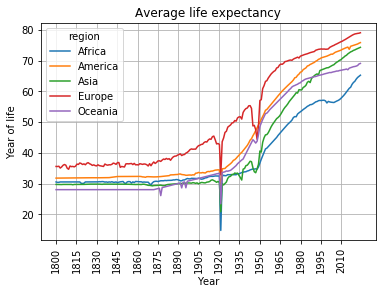

In [129]:
dflm_edited=df_life_edited.groupby('region').mean()
np.transpose(dflm_edited).plot(kind='line')
plt.xticks(np.arange(len(dflm_edited.columns), step=len(dflm_edited.columns)/15), dflm_edited.columns[::round(len(dflm_edited.columns)/15)],rotation='vertical')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Year of life')
plt.title('Average life expectancy')
plt.show()

### Research question 2    
In general, what does the number of babies per woman around the world look like?


The similar method employed for the life expectancy dataset is used for this dataset

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_baby= pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/children_per_woman_total_fertility.csv')

In [131]:
df_baby.head(2)

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.04,5.82,5.60,5.38,5.17,4.98,4.80,4.64,4.48,4.33
1,Albania,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,...,1.65,1.65,1.67,1.69,1.70,1.71,1.71,1.71,1.71,1.71


In [132]:
df_baby.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Columns: 220 entries, geo to 2018
dtypes: float64(219), object(1)
memory usage: 316.3+ KB


In [133]:
df_baby.dtypes.head(2)

geo      object
1800    float64
dtype: object

In [134]:
sum(df_baby.isnull().any())

0

In [135]:
sum(df_baby.duplicated())

0

In [136]:
df_baby['region']=np.repeat('',df_baby.shape[0])
dx_af=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Africa.txt')
dx_as=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Asia.txt')
dx_eu=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Europe.txt')
dx_oc=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Oceania.txt')
dx_am=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/America.txt')
dx_af=dx_af.values.T.tolist()
dx_as=dx_as.values.T.tolist()
dx_eu=dx_eu.values.T.tolist()
dx_oc=dx_oc.values.T.tolist()
dx_am=dx_am.values.T.tolist()
df_baby.loc[df_baby['geo'].isin(dx_af[0]),['region']]="Africa"
df_baby.loc[df_baby['geo'].isin(dx_as[0]),['region']]="Asia"
df_baby.loc[df_baby['geo'].isin(dx_eu[0]),['region']]="Europe"
df_baby.loc[df_baby['geo'].isin(dx_oc[0]),['region']]="Oceania"
df_baby.loc[df_baby['geo'].isin(dx_am[0]),['region']]="America"

In [137]:
sum(df_baby.isnull().any())

0

In [138]:
df_baby.loc[[37,38,40],['region']]="Africa"
df_baby.loc[96,['region']]="Europe"
df_baby.loc[106,['region']]="Oceania"
df_baby.query("region==''")

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,region


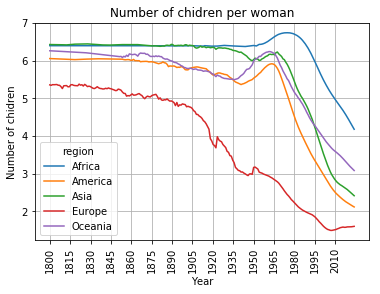

In [139]:
df_bm=df_baby.groupby('region').mean()
np.transpose(df_bm).plot(kind='line')
plt.xticks(np.arange(len(df_bm.columns), step=len(df_bm.columns)/15), df_bm.columns[::round(len(df_bm.columns)/15)],rotation='vertical')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of chidren')
plt.title('Number of chidren per woman')
plt.show()

In [140]:
df_baby.to_csv('df_baby_edited.csv', index=False)

### Answer Research question 2
* In general, the number of babies per woman around the world has decreased during the period shown  
* These rates had dropped significantly in all the regions since 1960s  
* The European always has the lowest rate whereas the African has the highest one

### Research question 3  
In general, what does the child mortality rate around the world look like?

The similar method employed for the life expectancy dataset is used for this dataset

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_mortality= pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/child_mortality_0_5_year_olds_dying_per_1000_born.csv')

In [142]:
df_mortality.head(2)

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,94.1,90.2,86.4,82.8,79.3,76.1,73.2,70.4,68.2,65.9
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,17.2,16.6,16.0,15.4,14.9,14.4,14.0,13.5,13.3,12.9


In [143]:
sum(df_mortality.isnull().any())

187

In [144]:
sum(df_mortality.duplicated())

0

In [145]:
df_mortality.dtypes.head(2)

geo      object
1800    float64
dtype: object

In [146]:
dy_af=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Africa.txt')
dy_as=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Asia.txt')
dy_eu=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Europe.txt')
dy_oc=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Oceania.txt')
dy_am=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/America.txt')
dy_af=dy_af.values.T.tolist()
dy_as=dy_as.values.T.tolist()
dy_eu=dy_eu.values.T.tolist()
dy_oc=dy_oc.values.T.tolist()
dy_am=dy_am.values.T.tolist()
df_mortality['region']=np.repeat('',df_mortality.shape[0])
df_mortality.loc[df_mortality['geo'].isin(dy_af[0]),['region']]="Africa"
df_mortality.loc[df_mortality['geo'].isin(dy_as[0]),['region']]="Asia"
df_mortality.loc[df_mortality['geo'].isin(dy_eu[0]),['region']]="Europe"
df_mortality.loc[df_mortality['geo'].isin(dy_oc[0]),['region']]="Oceania"
df_mortality.loc[df_mortality['geo'].isin(dy_am[0]),['region']]="America"

In [147]:
df_mortality.query("region==''")

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,region
38,"Congo, Dem. Rep.",423.0,423.0,423.0,423.0,423.0,423.0,423.0,423.0,423.0,...,116.0,112.0,108.0,104.0,101.0,97.6,94.3,92.5,90.0,
39,"Congo, Rep.",409.0,409.0,409.0,409.0,409.0,409.0,409.0,409.0,409.0,...,63.9,61.3,59.2,57.7,56.5,55.4,54.1,51.3,49.7,
41,Cote d'Ivoire,428.0,428.0,428.0,428.0,428.0,428.0,428.0,428.0,428.0,...,111.0,108.0,105.0,102.0,98.3,95.1,91.8,87.5,84.2,
98,"Macedonia, FYR",397.0,397.0,396.0,396.0,396.0,396.0,396.0,396.0,396.0,...,10.4,10.2,10.3,10.8,11.5,12.0,12.2,11.5,11.2,
109,"Micronesia, Fed. Sts.",451.0,448.0,445.0,442.0,439.0,436.0,433.0,430.0,427.0,...,40.0,38.8,37.7,36.5,35.4,34.3,33.3,33.3,32.8,


In [148]:
df_mortality.loc[[38,39,41],['region']]="Africa"
df_mortality.loc[98,['region']]="Europe"
df_mortality.loc[109,['region']]="Oceania"

In [149]:
df_mortality.query("region==''")

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,region


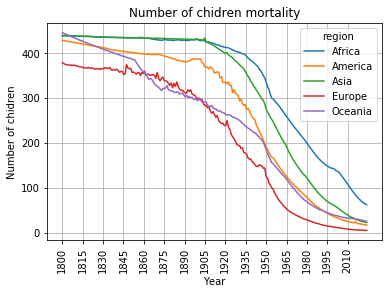

In [150]:
df_mm=df_mortality.groupby('region').mean()
np.transpose(df_mm).plot(kind='line')
plt.xticks(np.arange(len(df_mm.columns), step=len(df_mm.columns)/15), df_mm.columns[::round(len(df_mm.columns)/15)],rotation='vertical')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Number of chidren')
plt.title('Number of chidren mortality')
plt.show()

In [151]:
df_mortality.to_csv('df_mortality_edited.csv', index=False)

### Answer Research question 3
* In general, the number of children mortality rate around the world has decreased during the period shown  
* These rates had dropped significantly in all the regions since 1920s  
* The European has the lowest rate most of the time whereas the African has the highest one

### Research question 4
In general, what does the amount of CO2 emissions around the world look like?

The similar method employed for the life expectancy dataset is used for this dataset

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_co2= pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/co2_emissions_tonnes_per_person.csv')

In [153]:
df_co2.shape

(192, 216)

In [154]:
sum(df_co2.isnull().any())

212

In [155]:
sum(df_co2.duplicated())

0

In [156]:
df_co2.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,5.000000,5.000000,7.000000,5.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000,...,190.000000,190.000000,191.000000,191.000000,191.000000,191.000000,191.000000,192.000000,192.000000,192.000000
mean,0.456096,0.450782,0.620493,0.495536,0.425787,0.510852,0.528458,0.454672,0.516694,0.510382,...,4.632572,4.696715,4.700221,4.720091,4.506879,4.604666,4.550413,4.526914,4.465214,4.440085
std,0.952620,0.944430,0.994357,1.042398,0.938020,1.056255,1.102275,0.987935,1.075319,1.062071,...,6.738075,6.943929,6.706373,6.494926,6.157124,6.175062,6.099754,6.145365,5.861904,6.065368
min,0.005680,0.005610,0.005550,0.005480,0.005420,0.005360,0.005290,0.005230,0.005170,0.005110,...,0.020800,0.024400,0.023600,0.023200,0.022500,0.024300,0.026800,0.030300,0.030200,0.044500
25%,0.034800,0.023300,0.032500,0.023100,0.043825,0.044500,0.040000,0.041025,0.037900,0.039200,...,0.630250,0.611500,0.595500,0.587500,0.540500,0.607000,0.636500,0.613750,0.669500,0.659000
50%,0.037200,0.038600,0.047000,0.041200,0.046350,0.045600,0.043700,0.050150,0.049500,0.047700,...,2.140000,2.210000,2.230000,2.340000,2.400000,2.410000,2.410000,2.470000,2.420000,2.265000
75%,0.042800,0.046400,1.047950,0.047900,0.066800,0.058800,0.053300,0.098425,0.050900,0.049900,...,6.545000,6.425000,6.435000,6.535000,5.865000,6.120000,6.220000,6.100000,5.832500,5.695000
max,2.160000,2.140000,2.130000,2.360000,2.340000,2.400000,2.500000,2.470000,2.440000,2.410000,...,58.900000,62.800000,53.200000,46.700000,43.500000,40.700000,41.200000,44.600000,37.800000,45.400000


In [157]:
df_co2['region']=np.repeat('',df_co2.shape[0])
dz_af=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Africa.txt')
dz_as=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Asia.txt')
dz_eu=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Europe.txt')
dz_oc=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Oceania.txt')
dz_am=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/America.txt')
dz_af=dz_af.values.T.tolist()
dz_as=dz_as.values.T.tolist()
dz_eu=dz_eu.values.T.tolist()
dz_oc=dz_oc.values.T.tolist()
dz_am=dz_am.values.T.tolist()
df_co2.loc[df_co2['geo'].isin(dz_af[0]),['region']]="Africa"
df_co2.loc[df_co2['geo'].isin(dz_as[0]),['region']]="Asia"
df_co2.loc[df_co2['geo'].isin(dz_eu[0]),['region']]="Europe"
df_co2.loc[df_co2['geo'].isin(dz_oc[0]),['region']]="Oceania"
df_co2.loc[df_co2['geo'].isin(dz_am[0]),['region']]="America"

In [158]:
df_co2.query("region==''")

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,region
38,"Congo, Dem. Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0285,0.0301,0.0308,0.028,0.0313,0.0374,0.0348,0.0503,0.0634,
39,"Congo, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2910,0.3050,0.3180,0.410,0.4510,0.5010,0.6410,0.6500,0.6350,
41,Cote d'Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.3740,0.3550,0.3480,0.284,0.3420,0.3470,0.4340,0.4860,0.4900,
99,"Macedonia, FYR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.3000,4.6000,4.5500,4.200,4.1500,4.5400,4.3200,3.7800,3.6100,
110,"Micronesia, Fed. Sts.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.1500,1.3300,1.1200,1.550,1.1000,1.1700,1.3100,1.3800,1.4500,


In [159]:
df_co2.loc[[38,39,41],['region']]="Africa"
df_co2.loc[99,['region']]="Europe"
df_co2.loc[110,['region']]="Oceania"

In [160]:
df_co2.query("region==''")

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,region


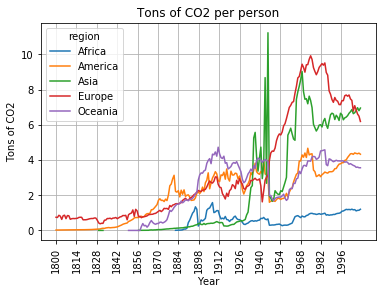

In [161]:
dfcm=df_co2.groupby('region').mean()
np.transpose(dfcm).plot(kind='line')
plt.xticks(np.arange(len(dfcm.columns), step=len(dfcm.columns)/15), dfcm.columns[::round(len(dfcm.columns)/15)],rotation='vertical')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Tons of CO2')
plt.title('Tons of CO2 per person')
plt.show()

In [162]:
df_co2.to_csv('df_co2_edited.csv', index=False)

### Answer Research question 4  
* In general, the amount of CO2 emission around the world has increased during the period shown
* The African countries always has the lowest emission rate 
* The Asian countries started with a low rate but rocketed in 1940s, even overtook that of the European

### Research question 5
In general, what does the incomes around the world look like?



The similar method employed for the life expectancy dataset is used for this dataset

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_income= pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

In [164]:
df_income.head(2)

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400


In [165]:
sum(df_income.isnull().any())

0

In [166]:
sum(df_income.duplicated())

0

In [167]:
df_income['region']=np.repeat('',df_income.shape[0])
dt_af=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Africa.txt')
dt_as=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Asia.txt')
dt_eu=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Europe.txt')
dt_oc=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/Oceania.txt')
dt_am=pd.read_csv('/Users/doanphuonglan/Desktop/Phongtran/Nano degree/Project 2/data/America.txt')
dt_af=dt_af.values.T.tolist()
dt_as=dt_as.values.T.tolist()
dt_eu=dt_eu.values.T.tolist()
dt_oc=dt_oc.values.T.tolist()
dt_am=dt_am.values.T.tolist()
df_income.loc[df_income['geo'].isin(dt_af[0]),['region']]="Africa"
df_income.loc[df_income['geo'].isin(dt_as[0]),['region']]="Asia"
df_income.loc[df_income['geo'].isin(dt_eu[0]),['region']]="Europe"
df_income.loc[df_income['geo'].isin(dt_oc[0]),['region']]="Oceania"
df_income.loc[df_income['geo'].isin(dt_am[0]),['region']]="America"

In [168]:
df_income.query("region==''")

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,region
38,"Congo, Dem. Rep.",485,487,489,491,493,495,497,499,501,...,609,630,653,685,726,750,742,745,751,
39,"Congo, Rep.",575,576,578,580,581,583,585,586,588,...,5190,5210,5270,5320,5540,5540,5300,5650,5620,
41,Cote d'Ivoire,812,816,819,822,825,829,832,835,839,...,2690,2510,2710,2880,3060,3250,3450,3600,3760,
98,"Macedonia, FYR",690,690,690,690,690,691,691,691,691,...,11400,11600,11600,11900,12300,12800,13100,13500,14000,
109,"Micronesia, Fed. Sts.",518,518,518,519,519,519,520,520,520,...,3340,3410,3430,3300,3180,3290,3330,3380,3410,


In [169]:
df_income.loc[[38,39,41],['region']]="Africa"
df_income.loc[98,['region']]="Europe"
df_income.loc[109,['region']]="Oceania"

In [170]:
df_income.query("region==''")

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,region


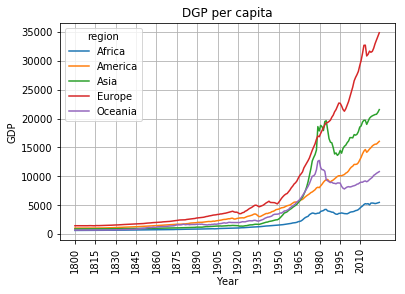

In [171]:
dfim=df_income.groupby('region').mean()
np.transpose(dfim).plot(kind='line')
plt.xticks(np.arange(len(dfim.columns), step=len(dfim.columns)/15), dfim.columns[::round(len(dfim.columns)/15)],rotation='vertical')
plt.grid()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('DGP per capita')
plt.show()

In [172]:
df_income.to_csv('df_income_edited.csv', index=False)

### Answer Research question 5
* In general, the GDP per capita index around the world has increased during the period shown
* The African countries always have the lowest GDP index whereas the European countries always have the highest ones
* The GDP index of all countries had increased significantly since 1950s

### Research question 6  
Which factor has the strongest relation to the life expectancy in your region?


For this question, I selected Europe region to analyse. All data is for European countries

Read the previous dataframe which are edited with region

In [173]:
df_income=pd.read_csv('df_income_edited.csv')
df_co2=pd.read_csv('df_co2_edited.csv')
df_mortality=pd.read_csv('df_mortality_edited.csv')
df_baby=pd.read_csv('df_baby_edited.csv')

Find the mean values of these dataframes

In [174]:
dfleu_mean=dfleu.mean()
dfieu_mean=df_income.query('region=="Europe"').mean()
dfceu_mean=df_co2.query('region=="Europe"').mean()
dfmeu_mean=df_mortality.query('region=="Europe"').mean()
dfbeu_mean=df_baby.query('region=="Europe"').mean()

Check the size of these dataframe to plot the scatter later

In [175]:
dfieu_mean.shape[0],dfceu_mean.shape[0], dfmeu_mean.shape[0],dfbeu_mean.shape[0]

(219, 215, 219, 219)

dfceu has the smaller size. See which rows are missing

In [57]:
dfceu_mean.tail(3)

2012    6.608095
2013    6.489048
2014    6.187381
dtype: float64

In [61]:
dfleu_mean.shape[0]

219

In [59]:
dfleu_mean.tail(5)

2014    78.639024
2015    78.736585
2016    78.826829
2017    78.890000
2018    79.040000
dtype: float64

Plot the scatter plot for all the factors versus Life Expectancy 

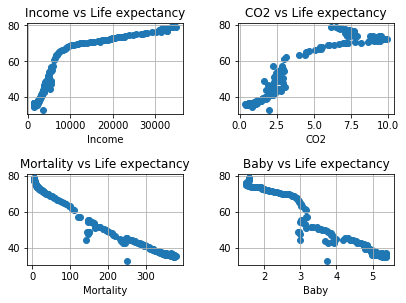

In [89]:
# Income
plt.subplot(221)
plt.scatter(dfieu_mean,dfleu_mean)
plt.xlabel('Income')
plt.title('Income vs Life expectancy')
plt.grid(True)

# CO2
plt.subplot(222)
plt.scatter(dfceu_mean,dfleu_mean[:-(dfleu_mean.shape[0]-dfceu_mean.shape[0])])
plt.xlabel('CO2')
plt.title('CO2 vs Life expectancy')
plt.grid(True)

# Mortality
plt.subplot(223)
plt.scatter(dfmeu_mean,dfleu_mean)
plt.xlabel('Mortality')
plt.title('Mortality vs Life expectancy')
plt.grid(True)

# Baby
plt.subplot(224)
plt.scatter(dfbeu_mean,dfleu_mean)
plt.xlabel('Baby')
plt.title('Baby vs Life expectancy')
plt.grid(True)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.65, wspace=0.35)
plt.show()


Perform Correlation Test to identify the strength of the relationship

In [90]:
np.corrcoef(dfieu_mean,dfleu_mean)

array([[ 1.        ,  0.90644319],
       [ 0.90644319,  1.        ]])

In [91]:
np.corrcoef(dfmeu_mean,dfleu_mean)

array([[ 1.        , -0.98461876],
       [-0.98461876,  1.        ]])

In [92]:
np.corrcoef(dfbeu_mean,dfleu_mean)

array([[ 1.        , -0.97342551],
       [-0.97342551,  1.        ]])

In [93]:
np.corrcoef(dfceu_mean,dfleu_mean[:-(dfleu_mean.shape[0]-dfceu_mean.shape[0])])

array([[ 1.        ,  0.95217169],
       [ 0.95217169,  1.        ]])

### Answer Research question 6
* In general, all the indicators, GDP per capital, Children Mortality rate, Number of babies per woman and 
the amount of CO2 emission have a strong correlation to the Life expectancy 
* The Children Mortality rate has the strongest correlation to the Life expectancy, corr()=-0.985, meaning that if the
Children Mortality rate increases, it is likely that the Life expectancy will decrease


### Research question 7 to 10
* What is the relationship between the number of babies per woman vs child mortality in your region?
* What is the relationship between the number of babies per woman vs life expectancy in your region?
* What is the relationship between the amount of CO2 emissions vs the Income in your region?
* Which factor has the strongest relation to the Income in your region?

For these questions, I combine all indicators to a single dataframe to do the analysis

In [105]:
df_euro_combined=pd.concat([dfleu_mean,dfieu_mean,dfmeu_mean,dfbeu_mean,dfceu_mean], axis=1, keys=['Life expectancy','Income','Mortality rate','Baby rate','CO2 emission'])

In [111]:
df_euro_combined.head(2)

,Life expectancy,Income,Mortality rate,Baby rate,CO2 emission
1800,35.565,1437.953488,378.825,5.35700,0.745867
1801,35.545,1437.372093,376.925,5.34525,0.736567


Plot the scatter matrix for all indicators

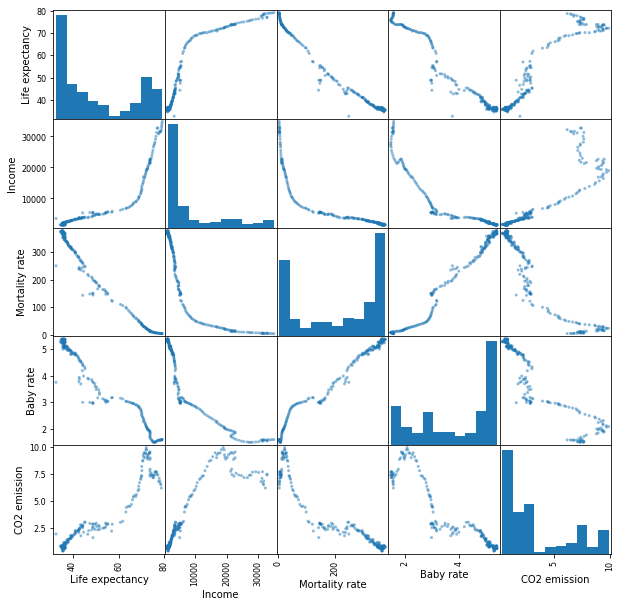

In [109]:
pd.plotting.scatter_matrix(df_euro_combined,figsize=(10,10))
plt.show()

Plot the heat map of the correlation coefficient for all indicators

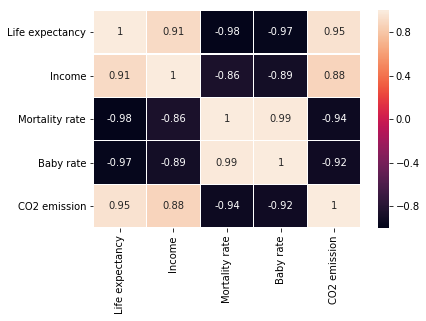

In [125]:
sns.heatmap(df_euro_combined.corr(), xticklabels=df_euro_combined.columns, 
            yticklabels=df_euro_combined.columns, 
            vmin=-1, vmax=1,
            linecolor='white',
            linewidths=0.1,
            annot=True)

### Answer Research question 7 to 10
* The correlation between the number of babies per woman vs child mortality in Europe is **positive and strong**, corr=0.99 
* The correlation between the number of babies per woman vs life expectancy in Europe is **negative and strong**, corr=-0.97
* The correlation between the amount of CO2 emissions vs the Income in Europe is **positive and quite strong**, corr=0.88
* Among the indicator, Life expectancy the **strongest relation** to the Income in Europe, corr=0.91

Please be noted that there are some repeatitions in the way to load txt file and assign regions to countries from 
Research question 1 to 5 because I worked on them seperately and do the final combination for the report only